In [3]:
import sys
import h5py
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/home/rebeccac/scratch/H_GASP')

from H_GASP import observations as obs

%load_ext autoreload
%autoreload 2

# Up-channelization of a map

This is for a pre-made map containing galaxies from the catalog or for maps with different 21cm components.
You can provide more than one map and they will be added up and produce a single up-channelized full map. 
To do that, just provide a list of the filenames for the map_paths variable below. 

You have the option of computing R and norm or just labelling their location on your machine if you already have them computed (just skip the upchan.get_R_norm() step in that case).

In [46]:
U = 8

fmax = 1414
fmin = 1409

map_paths = '/home/rebeccac/scratch/H_GASP/tutorials/products/HI_gals_3.h5'
output_directory = './upchan/'
output_filename = 'upchan_map.h5'
R_filename = 'R_{}_{}_{}.npy'.format(U, fmax, fmin)
norm_filename = 'norm_{}_{}_{}.npy'.format(U, fmax, fmin)
freq_filename = 'freqs_matrix_{}_{}_{}.npy'.format(U, fmax, fmin)

upchan = obs.Upchannelization(U,
                             fmax,
                             fmin,
                             output_directory,
                             output_filename, R_filename=R_filename,
                             norm_filename=norm_filename,
                             freqs_matrix_filename=freq_filename)

In [47]:
# computing reponse matrix and normalization vector

upchan.get_R_norm()

Up-channelization matrix with shape (80, 401) saved to ./upchan/R_8_1414_1409.npy.
Normalization vector with shape (80,) saved to ./upchan/norm_8_1414_1409.npy.
Matrix frequencies with shape (80,) saved to ./upchan/freqs_matrix_8_1414_1409.npy


In [48]:
# up-channelizing input map

f_start, f_end, nfreq = upchan.upchannelize(map_paths=map_paths)

The exact frequency specifications of this observation are:
f_start = 1414.4038870466127, f_end = 1408.5491957996103, nfreq = 80.
Use these exact values when computing the beam transfer matrices with drift. They are returned by this function.
Writing file ./upchan/full_input.h5 containing the input maps /home/rebeccac/scratch/H_GASP/tutorials/products/HI_gals_3.h5.
Channelized map saved at ./upchan/upchan_map.h5


Text(0.5, 1.0, 'Profile in input map')

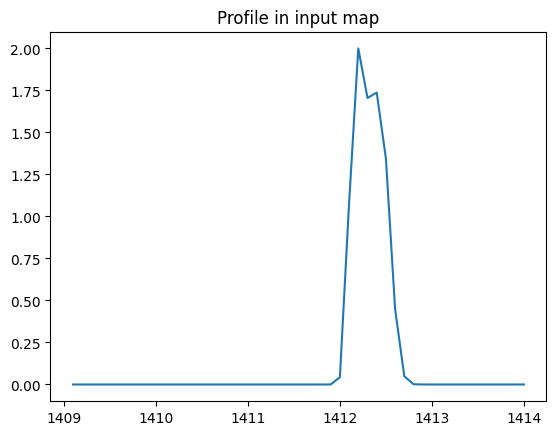

In [50]:
fff = h5py.File(map_paths)
upchan_map = fff['map'][:]
farray = fff['index_map']['freq']
freqs = [fi[0] for fi in farray]
fff.close()

gal_pix = np.argmax(upchan_map[20,0,:])

plt.plot(freqs, upchan_map[:,0,gal_pix])
plt.title('Profile in input map')

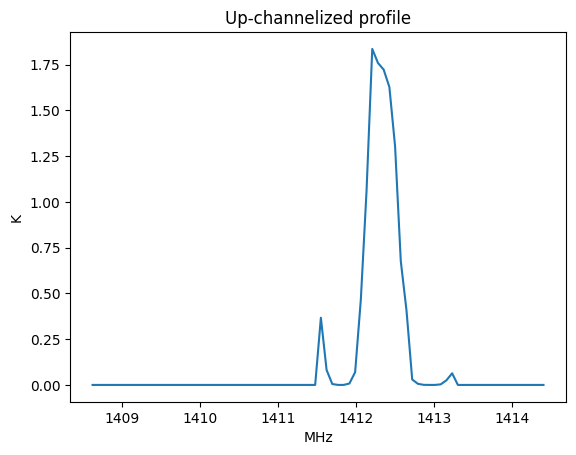

In [51]:
# looking at result
fff = h5py.File(output_directory+output_filename)
upchan_map = fff['map'][:]
farray = fff['index_map']['freq']
freqs = [fi[0] for fi in farray]
fff.close()

gal_pix = np.argmax(upchan_map[20,0,:])

plt.plot(freqs, upchan_map[:,0,450])
plt.xlabel('MHz')
plt.ylabel('K')
plt.title('Up-channelized profile')
plt.show()

# Up-channelization of a catalog

This creates an up-channelized map of an entire galaxy catalog without having to first manually create the input map with the galaxies in pristine form.

In [52]:
fmax = 1420
fmin = 1408

U = 8

nside = 32

output_directory = './catalog/'

output_filename = 'upchan_catalog.h5'

R_filename = 'R_{}.npy'.format(U)
norm_filename = 'norm_{}.npy'.format(U)
freq_filename = 'freqs_matrix_{}.npy'.format(U)

In [53]:
upchan_catalog = obs.Upchannelization(U, fmax, fmin, output_directory, output_filename, R_filename, norm_filename, freq_filename)

In [54]:
upchan_catalog.get_R_norm()

Up-channelization matrix with shape (176, 689) saved to ./catalog/R_8.npy.
Normalization vector with shape (176,) saved to ./catalog/norm_8.npy.
Matrix frequencies with shape (176,) saved to ./catalog/freqs_matrix_8.npy


In [59]:
fmax, fmin, nfreq = upchan_catalog.upchannelize(catalog=True, 
                                                catalog_filepath='/home/rebeccac/scratch/H_GASP/resources/HIMF_dec45_VolLim_10000.txt', 
                                                nside=nside)

The exact frequency specifications of this observation are:
f_start = 1420.258578293615, f_end = 1407.3782575502098, nfreq = 176.
Use these exact values when computing the beam transfer matrices with drift. They are returned by this function.
Creating up-channelized map from catalog HI_Catalog.txt with nside = 32.
Generating spectra for 10000 galaxies.
Up-channelizing spectra
Generating map
Channelized map saved at ./catalog/upchan_catalog.h5


In [60]:
# looking at result
fff = h5py.File('./catalog/upchan_catalog.h5')
upchan_catalog_map = fff['map'][:]
farray = fff['index_map']['freq']
freqs_catalog = [fi[0] for fi in farray]
fff.close()

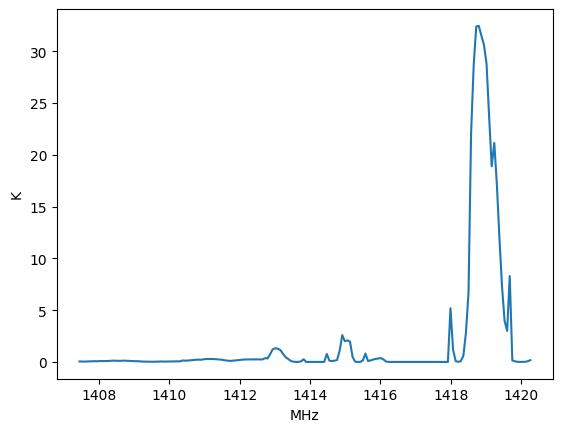

In [61]:
gal_pix = np.argmax(upchan_catalog_map[20,0,:])

plt.plot(freqs_catalog, upchan_catalog_map[:,0,gal_pix])
plt.xlabel('MHz')
plt.ylabel('K')
plt.show()